In [54]:
#2 importing modules
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [42]:
#3 Read csv into a pandas dataset
people = pd.read_csv("height_mass.csv")
people.head()

,Height (m),Mass (kg)
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


<AxesSubplot:xlabel='Mass (kg)', ylabel='Count'>

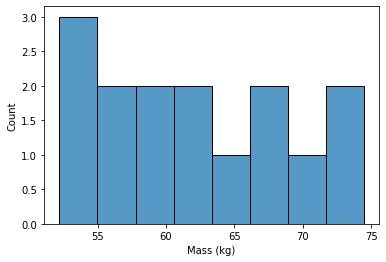

In [43]:
#4 seaborn histplot for mass distribution with bin#8
sb.histplot(data=people,x="Mass (kg)",bins=8)

plot with bin#8 gives clearest information because it does not overlap or break in between. Hence it is easy to indenfy the correlation predict height from mass. It cleary displays that people having mass between 52.5kg to 55 kg are heigher compare to the other slots of mass ranges.

<AxesSubplot:xlabel='Height (m)', ylabel='Count'>

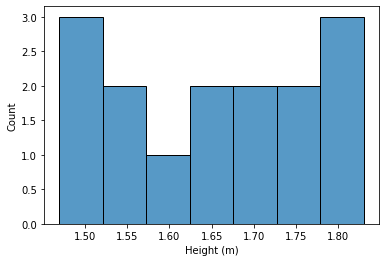

In [44]:
#5 seaborn histplot for height distribution with bin#7
sb.histplot(x="Height (m)",data=people, bins=7)

plot with bin#7 gives clearest information because it does not overlap or break in between. Hence it is easy to indenfy the correolation predict height from mass. It depicts that people having height between 1.575 mtr to 1.625 mtr are very few as compare to the other ranges of heights.

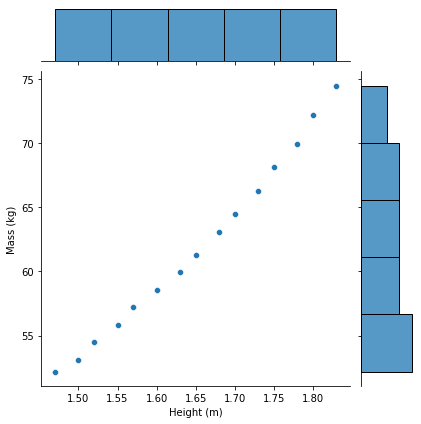

In [73]:
#6 Seaborn jointplot to plot x=Height, y=Mass
sb.jointplot(data=people, x="Height (m)", y="Mass (kg)")

this plot confirms the data showed in above histplots. we can clearly see the congestion of the points for mass below 55 kg, However, it requires deeper observation to clearly identify this fact for heights because of the nature of the given dataset.

In [46]:
#7 Split the data into training and testing data
x = people.drop(labels=["Mass (kg)"],axis=1)
y = people["Mass (kg)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(f"size of x_train: {x_train.shape}")
print(f"size of y_train: {y_train.shape}")
print(f"size of x_test: {x_test.shape}")
print(f"size of y_test: {y_test.shape}")

size of x_train: (10, 1)
size of y_train: (10,)
size of x_test: (5, 1)
size of y_test: (5,)


In [57]:
#8 Create the model and fit it to the training data
clf = LinearRegression()
clf.fit(x_train, y_train)


LinearRegression()

In [58]:
#9 Predict values based on testing data
prediction = clf.predict(x_test)
prediction

array([56.51573464, 55.20947156, 49.98441922, 51.94381385, 70.23149704])

In [60]:
#10 Print out error metrics
mae = metrics.mean_absolute_error(y_test, prediction)
mse = metrics.mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse) # or mse**(0.5)  
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results of sklearn.metrics:
MAE: 1.0056115525286913
MSE: 1.4598878526558121
RMSE: 1.2082581895670363


In [62]:
#11 Predict some specific mass
Test_point = [[1.70]]
print(clf.predict(Test_point))

[65.0064447]


C:\Users\nitin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Prediction is almost near to the reality.  The lower a mean sqared error, the more better the prediction.

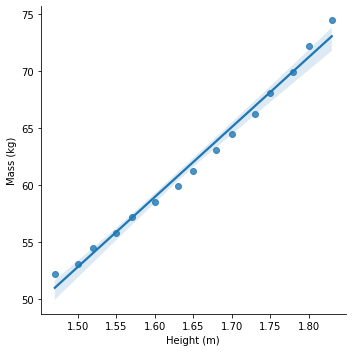

In [86]:
#12 Use seaborn to display an lmplot with the linear regression line

sb.lmplot(data=people, x="Height (m)", y="Mass (kg)", fit_reg=True)
plt.show()


Yes, this support the observations from step-6.